<a href="https://colab.research.google.com/github/NellyCN/alura-store/blob/main/analisis_datos_alura_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛍️ **Análisis de Datos - Alura Store Latam**

## 📌 Introducción

En este notebook se presenta un análisis exploratorio de datos (EDA) realizado sobre las ventas de Alura Store, que busca expandirse en América Latina. El objetivo es evaluar el desempeño de cada tienda con base en distintos KPIs, y así ayudar al Sr. Juan en la toma de decisiones e identificar cuál tienda tiene el menor rendimiento general.

## 🎯 Objetivos del análisis

- Identificar la tienda con menor facturación y desempeño general.

- Evaluar la percepción del cliente mediante calificaciones.

- Analizar la rentabilidad por categoría de producto.

- Medir la eficiencia en los costos de envío.

- Determinar qué tienda ofrece menor potencial de crecimiento.

## 📊 Análisis de KPIs

### **1. Análisis de facturación**

Calculamos la facturación total por tienda para identificar cuál genera más ingresos. Este KPI es clave para evaluar el desempeño económico de cada sucursal.


Mounted at /content/drive


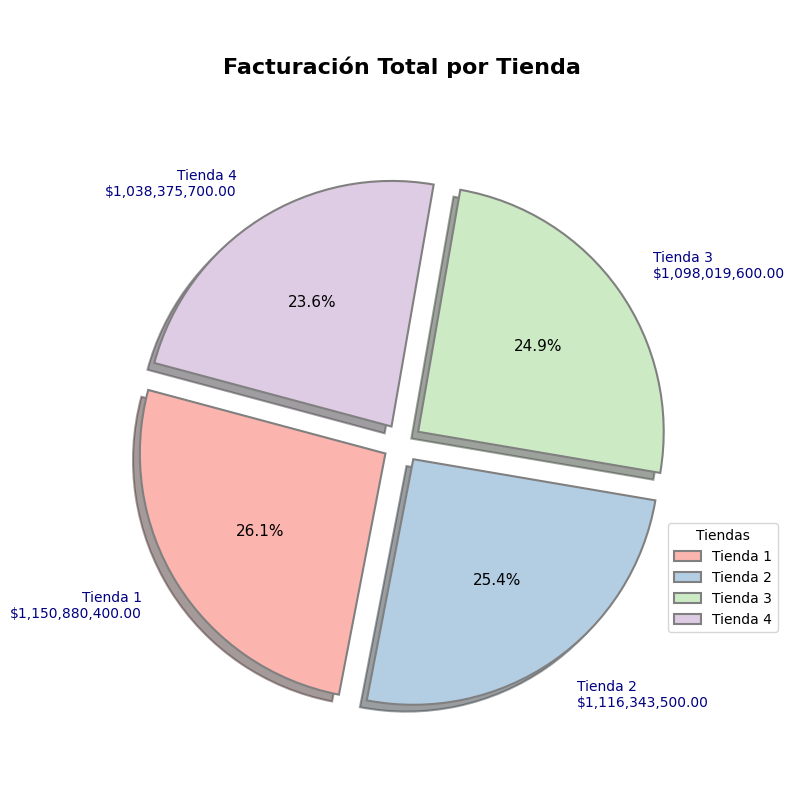

In [2]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive, files

# Montamos Google Drive
drive.mount('/content/drive')

# Diccionario con las URLs de las tiendas
urls = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Leemos los CSV y calculamos la facturación total por tienda
facturacion_total = {}

for tienda, url in urls.items():
    df = pd.read_csv(url)
    facturacion_total[tienda] = df["Precio"].sum()

# Convertimos el diccionario en una Serie ordenada
facturacion_total = pd.Series(facturacion_total).sort_values(ascending=False)
print
# Función para formatear los valores como dinero
def formato_personalizado(valor):
    return f"${valor:,.2f}"

# Extraemos etiquetas y valores
labels = facturacion_total.index
sizes = facturacion_total.values
porcentajes = sizes / sizes.sum() * 100

# Definimos colores y separación
colors = plt.cm.Pastel1.colors
explode = [0.08] * len(labels)

# Se crea el gráfico
fig, ax = plt.subplots(figsize=(8, 8))

# Creamos el gráfico de pastel
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,
    autopct='%1.1f%%',            # Porcentaje dentro de cada porción
    wedgeprops={'edgecolor': 'grey', 'linewidth': 1.5},  # Definimos el borde
    explode=explode,
    colors=colors,
    startangle=165,
    shadow=True,
    textprops=dict(color='black', fontsize=11)
)

# Añadimos etiquetas con nombre de tienda e importe total
for i, wedge in enumerate(wedges):      # Recorremos cada pieza del pie (i = índice)
    angulo = (wedge.theta2 + wedge.theta1) / 2.0    # Ubica la etiqueta en el centro angular de c/pieza. Angulo Medio de la Pieza = (Ang.Ini + Ang.Fin)/2
    x = np.cos(np.deg2rad(angulo))      # coordenada horizontal (eje X). Convierte el ángulo de grados a radianes
    y = np.sin(np.deg2rad(angulo))      # coordenada vertical (eje Y). Convierte el ángulo de grados a radianes
    ha = "left" if x > 0 else "right"   # alineación horizontal. Alínea el texto a la izquierda o derecha, dependiendo de si está en el lado izquierdo o derecho del gráfico (basado en la coordenada X).
    ax.text(x * 1.25, y * 1.25,         # aleja la etiqueta del centro, para que no quede sobre la porción sino más afuera
            f"{labels[i]}\n{formato_personalizado(sizes[i])}",  # muestra el nombre de la tienda y el valor debajo.
            ha=ha, va='center', color='navy', fontsize=10)

# Añadimos una leyenda con colores de tienda
ax.legend(wedges, labels, title="Tiendas", loc="center left", bbox_to_anchor=(0.95, -0.2, 0.5, 1))

# Título y formato final
plt.title("\n\nFacturación Total por Tienda\n", fontsize=16, fontweight='bold')
plt.axis('equal')  # Asegura forma circular
plt.tight_layout()

# Guardamos como PDF en Drive
plt.savefig("/content/drive/MyDrive/Alura/Graficos/facturacion_por_tienda.pdf", format='pdf', bbox_inches='tight')

# También puedes descargarlo directamente a tu PC
#files.download("/content/drive/MyDrive/facturacion_por_tienda.pdf")

# Mostramos el gráfico en pantalla
plt.show()

🔍 **Interpretación:**

- La Tienda 1 presenta el mayor ingreso, seguida por la Tienda 2. La Tienda 4 tiene el menor desempeño, lo cual puede influir en la decisión final del negocio.

- La tienda con mayor facturación se perfila como la más rentable. Sin embargo, es importante considerar también otros indicadores como la satisfacción del cliente y los costos asociados.

- Una tienda con baja facturación puede indicar baja demanda, escaso alcance comercial o problemas logísticos.

### **2. Ventas por categoría**

Para obtener las Ventas por categoría, sumamos las ventas y cantidades vendidas por tienda. Así obtendremos el volumen de ventas por categoría y por tienda, así como las ventas obtenidas por categoría en cada tienda, lo que puede relacionarse con el posicionamiento y la demanda del mercado.

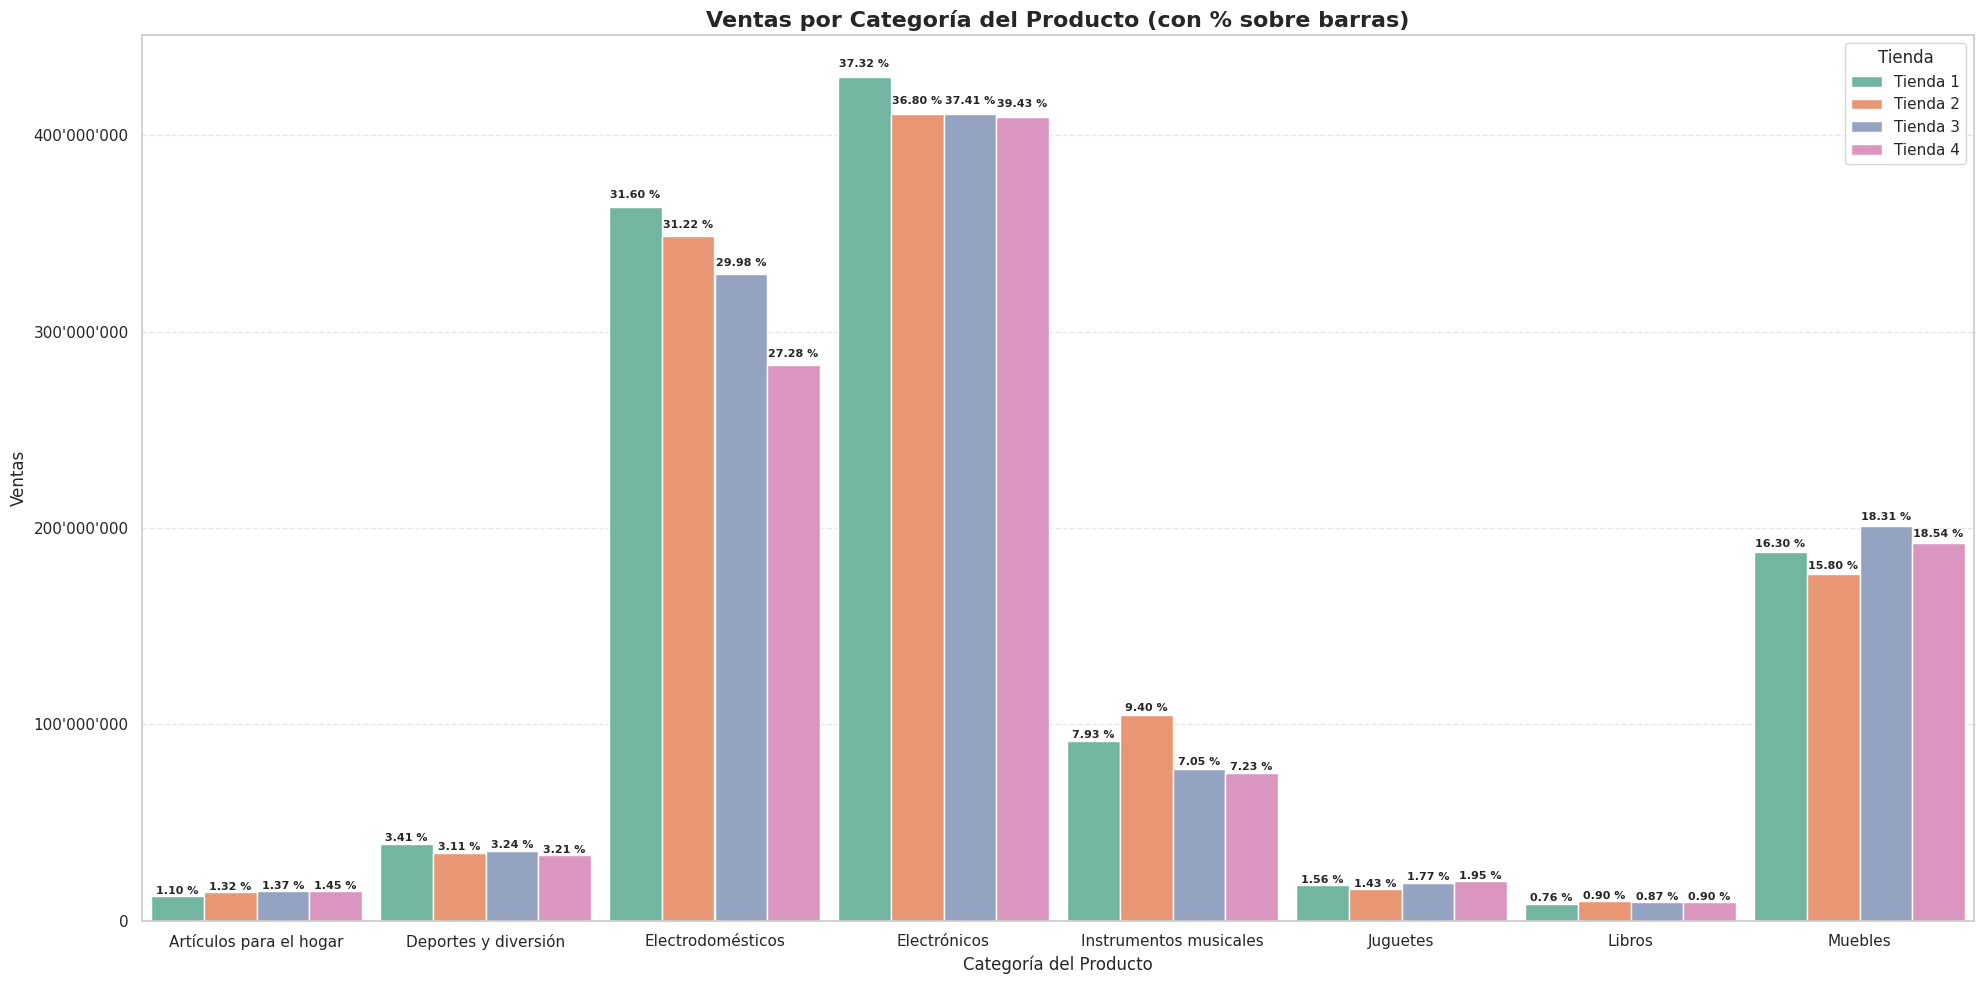


Resumen de ventas por categoría y tienda:



,Tienda,Categoría del Producto,Precio,Porcentaje
0,Tienda 1,Artículos para el hogar,"$12'698'400,00",1.10 %
1,Tienda 1,Deportes y diversión,"$39'290'000,00",3.41 %
2,Tienda 1,Electrodomésticos,"$363'685'200,00",31.60 %
3,Tienda 1,Electrónicos,"$429'493'500,00",37.32 %
4,Tienda 1,Instrumentos musicales,"$91'299'000,00",7.93 %
5,Tienda 1,Juguetes,"$17'995'700,00",1.56 %
6,Tienda 1,Libros,"$8'784'900,00",0.76 %
7,Tienda 1,Muebles,"$187'633'700,00",16.30 %
8,Tienda 2,Artículos para el hogar,"$14'746'900,00",1.32 %
9,Tienda 2,Deportes y diversión,"$34'744'500,00",3.11 %


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import pandas as pd

# Lista para almacenar DataFrames individuales
dfs = []

# Lee cada archivo y agregar una columna 'Tienda' para identificar su origen
for nombre_tienda, url in urls.items():
    df = pd.read_csv(url)
    df['Tienda'] = nombre_tienda
    dfs.append(df)

# Une todos los DataFrames en uno solo
df_total = pd.concat(dfs, ignore_index=True)

# Agrupar por Tienda y Categoría, y sumar ventas (Precio)
ventas_por_categoria = df_total.groupby(['Tienda', 'Categoría del Producto'])['Precio'].sum().reset_index()

# Cálculo total por tienda
totales_por_tienda = ventas_por_categoria.groupby('Tienda')['Precio'].transform('sum')

# Cálculo porcentaje
ventas_por_categoria['Porcentaje %'] = (ventas_por_categoria['Precio'] / totales_por_tienda) * 100

# Formateando Las columnas precio y %(Porcentaje)
#ventas_por_categoria['Precio'] = ventas_por_categoria['Precio'].apply(lambda x: f"{x:,.2f}")
ventas_por_categoria['Porcentaje %'] = ventas_por_categoria['Porcentaje %'].apply(lambda x: f"{x:.2f} %")

# Mostrar resultado
#print(ventas_por_categoria)

# Asegurarse de que Precio es numérico
ventas_por_categoria['Precio'] = ventas_por_categoria['Precio'].astype(float)

# Calcular el porcentaje real si no está
ventas_por_categoria['Porcentaje'] = ventas_por_categoria.groupby('Tienda')['Precio'].transform(
    lambda x: x / x.sum() * 100
)

# Crear gráfico solo con porcentaje como etiqueta
plt.figure(figsize=(20, 10))
ax = sns.barplot(
    data=ventas_por_categoria,
    x='Categoría del Producto',
    y='Precio',
    hue='Tienda',
    palette='Set2',
    dodge=0.6,
    width=0.92
)

# Agregar etiquetas: solo porcentaje con 2 decimales
for bar in ax.patches:
    altura = bar.get_height()
    if altura == 0:
        continue

    x = bar.get_x() + bar.get_width() / 2
    y = altura

    for _, row in ventas_por_categoria.iterrows():
        if abs(row['Precio'] - altura) < 1e-2:
            porcentaje_txt = f"{row['Porcentaje']:.2f} %"
            ax.text(
                x, y + y * 0.01,
                porcentaje_txt,
                ha='center', va='bottom',
                fontsize=8, fontweight='bold'
            )
            break

# Formatear eje Y estilo latino
formatter = mtick.FuncFormatter(lambda x, _: f"{x:,.0f}".replace(",", "X").replace(".", ",").replace("X", "'"))
ax.yaxis.set_major_formatter(formatter)

# Estética general
plt.title('Ventas por Categoría del Producto (con % sobre barras)', fontsize=16, fontweight='bold')
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas')
plt.legend(title='Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Crear columnas con formato
ventas_tabla = ventas_por_categoria.copy()
ventas_tabla['Precio'] = ventas_tabla['Precio'].apply(lambda x: f"${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "'"))
ventas_tabla['Porcentaje'] = ventas_tabla['Porcentaje'].apply(lambda x: f"{x:.2f} %")

# Mostrar tabla final
ventas_tabla_formateada = ventas_tabla[['Tienda', 'Categoría del Producto', 'Precio', 'Porcentaje']]
print("\nResumen de ventas por categoría y tienda:\n")
display(ventas_tabla_formateada)


🔍 **Interpretación:**
Las categorías más populares en Ventas en las 4 tiendas serían:
*   Electrónicos
*   Electrodomésticos


      Tienda   Categoría del Producto  Cantidad Destacado
0   Tienda 1  Artículos para el hogar       171        No
1   Tienda 1     Deportes y diversión       284        No
2   Tienda 1        Electrodomésticos       312        No
3   Tienda 1             Electrónicos       448        No
4   Tienda 1   Instrumentos musicales       182        No
5   Tienda 1                 Juguetes       324        No
6   Tienda 1                   Libros       173        No
7   Tienda 1                  Muebles       465        Sí
8   Tienda 2  Artículos para el hogar       181        No
9   Tienda 2     Deportes y diversión       275        No
10  Tienda 2        Electrodomésticos       305        No
11  Tienda 2             Electrónicos       422        No
12  Tienda 2   Instrumentos musicales       224        No
13  Tienda 2                 Juguetes       313        No
14  Tienda 2                   Libros       197        No
15  Tienda 2                  Muebles       442        Sí
16  Tienda 3  

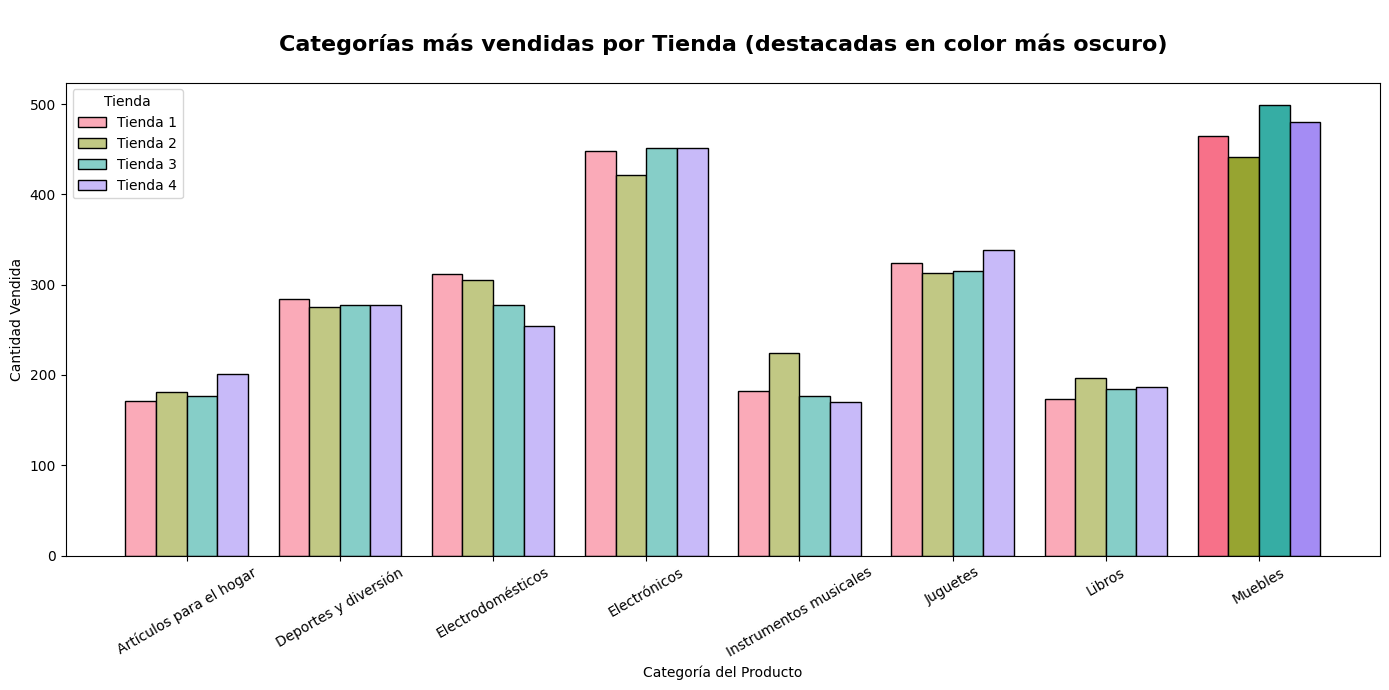

In [5]:
# CANTIDAD DE PRODUCTOS VENDIDOS POR TIENDA, CATEGORÍAS MÁS POPULARES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define las URLs de los archivos CSV de cada tienda
urls = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Lista para almacenar DataFrames individuales
dfs = []

# Lee cada archivo y agregar una columna 'Tienda' para identificar su origen
for nombre_tienda, url in urls.items():
    df = pd.read_csv(url)
    df['Tienda'] = nombre_tienda   # Añade columna para identificar la tienda
    dfs.append(df)

# Une todos los DataFrames en uno solo
df_total = pd.concat(dfs, ignore_index=True)

# --------
# Aseguramos el tipo de dato correcto
df_total['Categoría del Producto'] = df_total['Categoría del Producto'].astype(str)
df_total['Tienda'] = df_total['Tienda'].astype(str)

# Agrupamos los datos por tienda y categoría en el df cantidad_por_categoria
cantidad_por_categoria = df_total.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad')

# 🔍 Identificar la categoría MÁS popular por tienda. Encuentra la fila con el valor máximo por tienda.
top_categorias = cantidad_por_categoria.loc[cantidad_por_categoria.groupby('Tienda')['Cantidad'].idxmax()]

# Añadimos una columna "Destacado", con valor 'Sí' si esa categoría es la más vendida en su tienda, y 'No' en caso contrario.
cantidad_por_categoria['Destacado'] = cantidad_por_categoria.apply(
    lambda row: 'Sí' if ((row['Tienda'], row['Categoría del Producto']) in zip(top_categorias['Tienda'], top_categorias['Categoría del Producto'])) else 'No',
    axis=1
)
print(cantidad_por_categoria)

# Crear una paleta que combine tienda + si es destacada
tiendas = cantidad_por_categoria['Tienda'].unique()
colores_base = sns.color_palette("husl", len(tiendas))
paleta_completa = {}

# Para cada tienda, se usa un color específico.
# Para destacar, se deja el color base. Para no destacar, se aclara el color.

for i, tienda in enumerate(tiendas):
    paleta_completa[(tienda, 'Sí')] = colores_base[i]  # color base (más fuerte)
    paleta_completa[(tienda, 'No')] = tuple([c + 0.4*(1-c) for c in colores_base[i]])  # tono más claro

cantidad_por_categoria['Color'] = cantidad_por_categoria.apply(lambda row: paleta_completa[(row['Tienda'], row['Destacado'])], axis=1)

# GRÁFICO DE BARRAS AGRUPADAS
plt.figure(figsize=(14, 7))

# Se definen las categorías que irán en el eje X. Obtenemos todas las categorías únicas
categorias = cantidad_por_categoria['Categoría del Producto'].unique()
ancho_barra = 0.2
desplazamientos = {     # desplazamiento horizontal de las barras
    'Tienda 1': -1.5 * ancho_barra,
    'Tienda 2': -0.5 * ancho_barra,
    'Tienda 3': 0.5 * ancho_barra,
    'Tienda 4': 1.5 * ancho_barra,
}

# Para cada tienda se dibujan sus barras en posiciones desplazadas, con su color:
for tienda in tiendas:
    datos_tienda = cantidad_por_categoria[cantidad_por_categoria['Tienda'] == tienda]
    posiciones = [i + desplazamientos[tienda] for i in range(len(categorias))]
    colores = datos_tienda['Color'].tolist()
    plt.bar(
        posiciones,
        datos_tienda['Cantidad'],
        width=ancho_barra,
        color=colores,
        edgecolor='black',
        label=tienda
    )

# Formato del gráfico
plt.xticks(range(len(categorias)), categorias, rotation=30)
plt.title('\nCategorías más vendidas por Tienda (destacadas en color más oscuro)\n', fontsize=16, fontweight='bold')
plt.xlabel('Categoría del Producto')  # Eje X
plt.ylabel('Cantidad Vendida')        # Eje Y
plt.legend(title='Tienda')            #Leyenda
plt.tight_layout()    # Función q ajusta automáticamente los márgenes del gráfico para que todo (etiquetas, ejes, leyendas) quede visible y no se recorte.
plt.show()

🔍 **Interpretación:**

Una tienda con alto volumen puede tener una buena estrategia comercial, aunque podría tener márgenes bajos si vende productos de bajo valor.

# 3. Calificación promedio de la tienda


Se calcula la calificación promedio de los productos vendidos en cada tienda, brindando una visión del nivel de satisfacción del cliente.

       Tienda                   Producto  Calificación
0    Tienda 1          Ajedrez de madera      4.428571
1    Tienda 1                    Armario      3.950000
2    Tienda 1          Asistente virtual      4.075000
3    Tienda 1                Auriculares      3.640000
4    Tienda 1  Auriculares con micrófono      3.969697
..        ...                        ...           ...
199  Tienda 4                 Smartwatch      3.974359
200  Tienda 4            Sofá reclinable      3.872340
201  Tienda 4              TV LED UHD 4K      3.575000
202  Tienda 4                Tablet ABXY      4.022222
203  Tienda 4               Vaso térmico      4.145833

[204 rows x 3 columns]


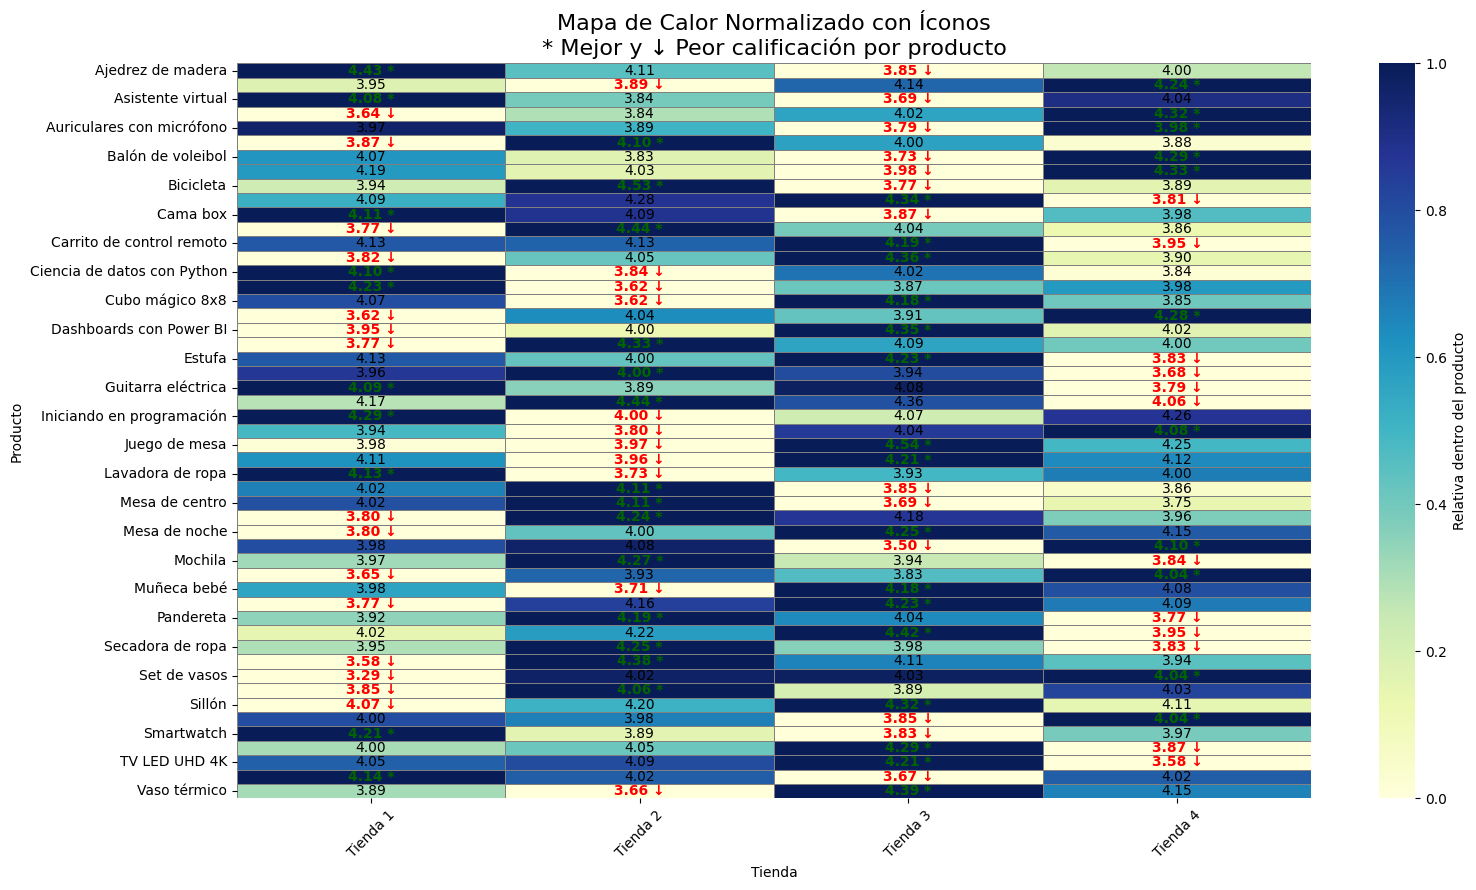

In [6]:
import numpy as np

# Calificación promedio por tienda y producto
promedio_por_producto_tienda = df_total.groupby(['Tienda', 'Producto'])['Calificación'].mean().reset_index()

# Mostramos los primeros resultados
print(promedio_por_producto_tienda)

# Tabla dinámica original
heatmap_data = promedio_por_producto_tienda.pivot(index='Producto', columns='Tienda', values='Calificación')

# Normalizamos por fila
heatmap_normalizado = heatmap_data.subtract(heatmap_data.min(axis=1), axis=0)
heatmap_normalizado = heatmap_normalizado.divide(heatmap_normalizado.max(axis=1), axis=0)

# Mapa base (normalizado)
plt.figure(figsize=(16, 9))
ax = sns.heatmap(
    heatmap_normalizado,
    annot=False,                   # Ocultamos el texto por defecto
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Relativa dentro del producto'},
    vmin=0, vmax=1
)

# Recorremos para añadir íconos y calificaciones
for y, producto in enumerate(heatmap_data.index):
    fila = heatmap_data.loc[producto]
    max_tienda = fila.idxmax()
    min_tienda = fila.idxmin()
    for x, tienda in enumerate(heatmap_data.columns):
        valor = fila[tienda]
        icono = ""
        color = "black"

        if tienda == max_tienda:
            icono = " *"
            color = "darkgreen"
        elif tienda == min_tienda:
            icono = " ↓"
            color = "red"

        ax.text(
            x + 0.5, y + 0.5,
            f"{valor:.2f}{icono}",
            ha='center', va='center',
            color=color,
            fontsize=10,
            weight='bold' if icono else 'normal'
        )

# Títulos y ajustes
plt.title('Mapa de Calor Normalizado con Íconos\n* Mejor y ↓ Peor calificación por producto', fontsize=16)
plt.xlabel('Tienda')
plt.ylabel('Producto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


🔍 **Interpretación:**

Las tiendas con calificaciones más altas podrían tener una mejor atención al cliente, logística o calidad en sus productos, lo que influye en la decisión de expansión.

### **4. Productos más y menos vendidos**

Se identifican los productos con mayores y menores volúmenes de venta. Se analiza si estos productos están concentrados en alguna tienda específica.

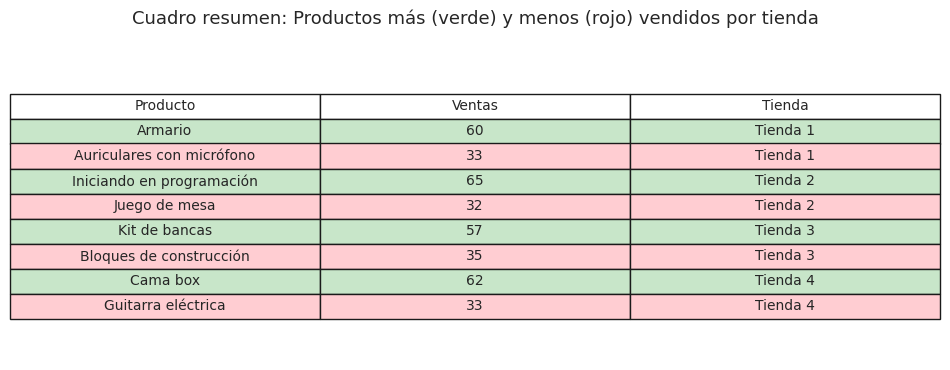

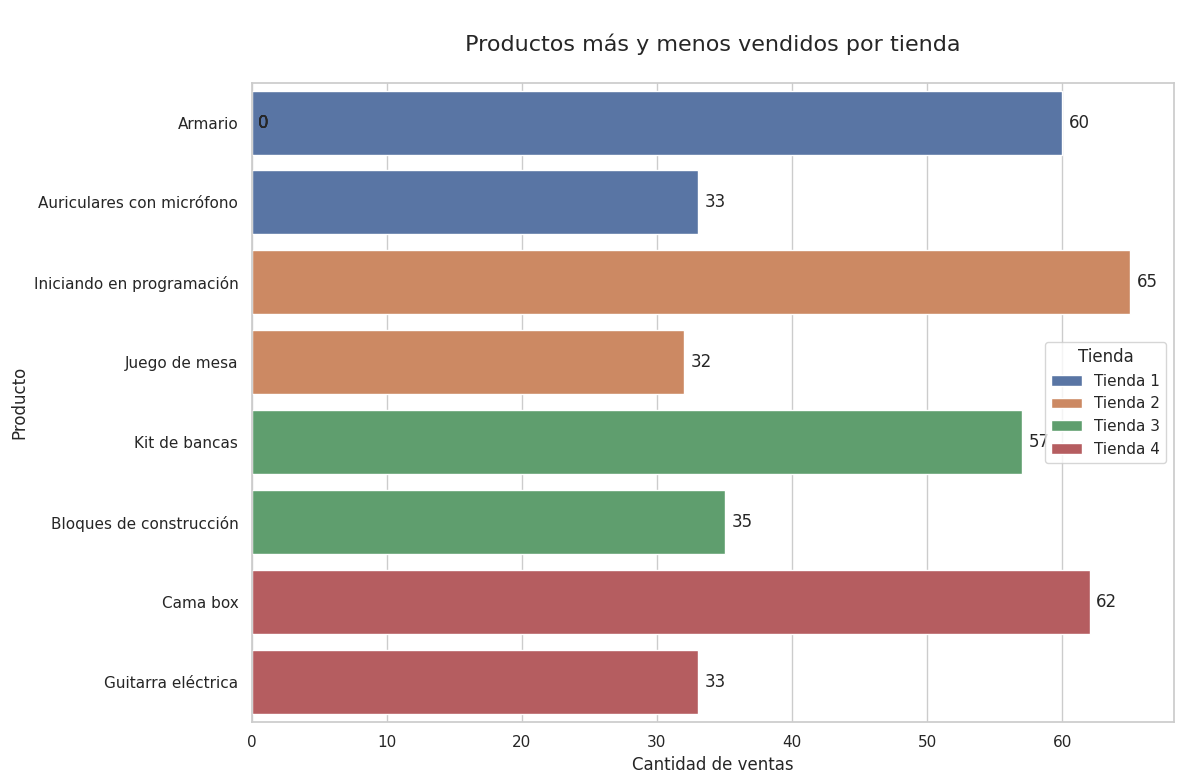

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos la tabla de resumen (como hicimos antes)
ventas_por_producto = df_total.groupby(['Tienda', 'Producto']).size().reset_index(name='Ventas')

def obtener_extremos(grupo, tienda):
    maximo = grupo.loc[grupo['Ventas'].idxmax()].copy()
    minimo = grupo.loc[grupo['Ventas'].idxmin()].copy()
    maximo['Tienda'] = tienda
    minimo['Tienda'] = tienda
    return pd.DataFrame([maximo, minimo])

extremos_list = []
for tienda, grupo in ventas_por_producto.groupby('Tienda'):
    extremos = obtener_extremos(grupo.drop(columns='Tienda'), tienda)
    extremos_list.append(extremos)

extremos_por_tienda = pd.concat(extremos_list, ignore_index=True)
cuadro_resumen = extremos_por_tienda.sort_values(by=["Tienda", "Ventas"], ascending=[True, False])

# --- Mostrar tabla con color
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')

tabla = ax.table(
    cellText=cuadro_resumen.values,
    colLabels=cuadro_resumen.columns,
    cellLoc='center',
    loc='center'
)

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.2, 1.5)

# Colorea filas: Verde si es más vendido, Rojo si es menos vendido (alternan por tienda)
for i, (_, row) in enumerate(cuadro_resumen.iterrows()):
    color = '#c8e6c9' if i % 2 == 0 else '#ffcdd2'  # Verde claro / Rojo claro
    for j in range(len(row)):
        tabla[(i + 1, j)].set_facecolor(color)

plt.title("Cuadro resumen: Productos más (verde) y menos (rojo) vendidos por tienda", fontsize=13, pad=20)

# --- Paso 4: Gráfico con etiquetas
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    data=extremos_por_tienda,
    x='Ventas',
    y='Producto',
    hue='Tienda'
)

plt.title("\n Productos más y menos vendidos por tienda \n", fontsize=16)
plt.xlabel("Cantidad de ventas")
plt.ylabel("Producto")
plt.legend(title="Tienda")

# Añadir etiquetas numéricas en las barras
for p in barplot.patches:
    ancho = p.get_width()
    plt.text(
        ancho + 0.5,
        p.get_y() + p.get_height() / 2,
        int(ancho),
        va='center'
    )

plt.tight_layout()
plt.show()

🔍 **Interpretación:**

Si una tienda concentra los productos menos vendidos, podría estar mal gestionando su inventario o no tener claridad sobre el perfil del cliente.

# 5. Envío promedio por tienda

Se analiza el promedio de los costos de envío por tienda, ya que estos influyen directamente en la percepción del cliente y en la rentabilidad.

In [8]:
# Calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.
costo_envio_promedio = df_total.groupby('Tienda')['Costo de envío'].mean().reset_index()
costo_envio_promedio['Costo de envío'] = costo_envio_promedio['Costo de envío'].apply(lambda x: f"${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "'"))

print("\n Costo de envío promedio para cada tienda:\n")
print(costo_envio_promedio)




 Costo de envío promedio para cada tienda:

     Tienda Costo de envío
0  Tienda 1     $26'018,61
1  Tienda 2     $25'216,24
2  Tienda 3     $24'805,68
3  Tienda 4     $23'459,46


     Tienda  Costo de envío
0  Tienda 1        26018.61
1  Tienda 2        25216.24
2  Tienda 3        24805.68
3  Tienda 4        23459.46


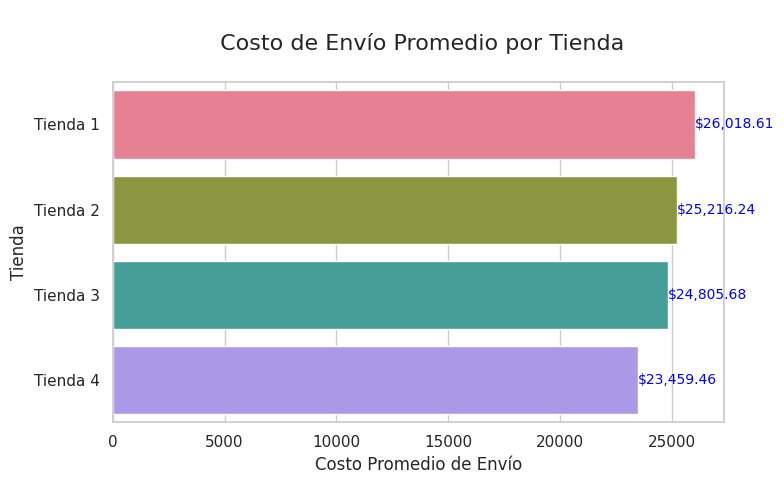

In [11]:
# Mostramos las primeras columnas del DataFrame para identificar el nombre exacto de la columna de envío
#print(df_total.columns)

# Agrupamos por tienda y calculamos el promedio
costo_envio_promedio = df_total.groupby("Tienda")["Costo de envío"].mean().reset_index()

# Redondeamos a 2 decimales para mejorar la presentación
costo_envio_promedio["Costo de envío"] = costo_envio_promedio["Costo de envío"].round(2)

# Mostramos la tabla
print(costo_envio_promedio)

# Visualización con gráfico de barras:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    data=costo_envio_promedio,
    x="Costo de envío",
    y="Tienda",
    hue="Tienda",  # necesario para usar 'palette' sin warning
    palette=sns.color_palette("husl", 4),
    dodge=False,
    legend=False  # no mostrar leyenda duplicada
)

# Añadir etiquetas con los valores sobre las barras
for index, row in costo_envio_promedio.iterrows():
    plt.text(
        row["Costo de envío"] + 0.1,  # posición horizontal
        index,                        # posición vertical
        f"${row['Costo de envío']:,.2f}",  # Separador de miles
        va='center',
        fontsize=10,
        color='blue'
    )

# Título y ejes
plt.title("\n Costo de Envío Promedio por Tienda\n ", fontsize=16)
plt.xlabel("Costo Promedio de Envío")
plt.ylabel("Tienda")
plt.tight_layout()
plt.show()

🔍 **Interpretación:**

Una tienda con costos de envío más bajos puede tener una logística más eficiente o convenios favorables con transportistas.



## 🧾 **Conclusión general**
Con base en los KPIs analizados, se puede tener una visión integral del desempeño de cada tienda de Alura Store. Este análisis busca **identificar la tienda con menor potencial comercial y operativa, la más ineficiente,** para que el Sr. Juan pueda tomar una decisión informada sobre cuál tienda vender y redistribuir sus recursos en estrategias más rentables.

In [ ]:
# Exportar el DataFrame combinado a un archivo Excel
df_total.to_excel("data_tiendas_unificadas.xlsx", index=False)
